In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt  
import numpy as np

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import re

In [11]:
# !pip install missingno==0.4.1

In [12]:
import missingno as msno

In [13]:
import requests
from bs4 import BeautifulSoup

In [14]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys

In [15]:
import time

In [119]:
wine_df = pd.read_csv("wine_all_final.csv")
wine_df.head()

,name,price,score,winery,grapes,country,region,alcohol,foods,wine_id,re
0,Rim Rock Vineyard Syrah 2017,52.99,4.3,Piedrasassi,Shiraz/Syrah,United States,Arroyo Grande Valley,13.5,"['Beef', 'Lamb', 'Game (deer, venison)', 'Poul...",19603399,['Dry tingly cool bottle pairs with seafood ho...
1,Tradition Châteauneuf-du-Pape 2015,54.99,4.2,Domaine Giraud,Grenache,France,Châteauneuf-du-Pape,NaN,"['Lamb', 'Pork', 'Poultry']",18191466,"['Black cherry, oak. Leather, earthy. Great b..."
2,Estate Cabernet Sauvignon 2013,73.95,4.3,Brandlin,Cabernet Sauvignon,United States,Mount Veeder,NaN,"['Beef', 'Lamb', 'Game (deer, venison)', 'Matu...",13886692,['Wine walk favorite! This estate cab is fant...
3,Imperio LXXIV Primitivo di Manduria 2018,19.99,4.2,Feudo Croce,Primitivo,Italy,Primitivo di Manduria,14.5,"['Beef', 'Pasta', 'Lamb', 'Poultry']",25311528,"['Plum, fig, pepper, cherry. ', 'Lots of dark ..."
4,Corte di Cama Sforzato di Valtellina 2016,58.50,4.3,Mamete Prevostini,Nebbiolo,Italy,Sforzato della Valtellina,NaN,"['Beef', 'Lamb', 'Game (deer, venison)', 'Poul...",25588649,['A bit of a disappointment honestly. Have rea...


In [8]:
wine_df.isnull().sum()

name          0
price        69
score         0
winery        0
grapes       60
country       7
region        7
alcohol    9259
foods       281
wine_id       0
re            0
dtype: int64

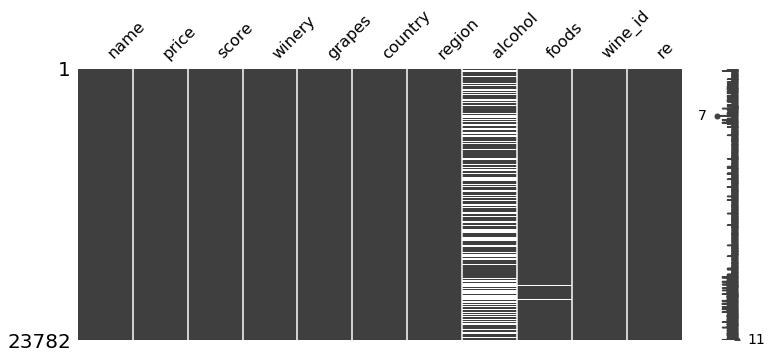

In [10]:
msno.matrix(wine_df, figsize=(12,5))

In [12]:
wine_df['alcohol'].describe()

count    14523.000000
mean        13.484473
std          2.913991
min          0.000000
25%         13.000000
50%         14.000000
75%         14.500000
max         45.000000
Name: alcohol, dtype: float64

# alcohol 5도 이하, 40도 이상 살펴보기 

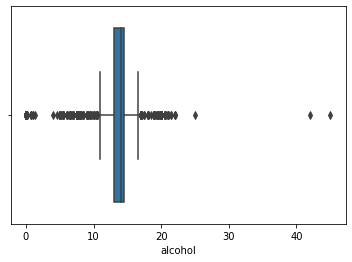

In [19]:
sns.boxplot(x=wine_df['alcohol'])

In [29]:
wine_df[(wine_df['alcohol']<5) & (wine_df['alcohol']!=0)]

,name,price,score,winery,grapes,country,region,alcohol,foods,wine_id,re
1717,Shiraz 2003,59.99,4.3,Barossa Old Vine Company,Shiraz/Syrah,Australia,Barossa Valley,0.1,"['Beef', 'Lamb', 'Game (deer, venison)', 'Poul...",1510660,"['Full of cherry with creamy finish..', 'Wow. ..."
3129,Lee Vineyard Pinot Noir 2017,64.99,4.3,Saintsbury,Pinot Noir,United States,Los Carneros,1.4,"['Beef', 'Veal', 'Game (deer, venison)', 'Poul...",22490883,['more acidic than most recent saintsbury wine...
10784,Gigondas Le Claux 2015,119.95,4.3,Château de Saint Cosme,Grenache,France,Gigondas,0.8,"['Beef', 'Lamb', 'Game (deer, venison)']",13701963,"['Good wine. Smooth ', 'This is now drinking w..."
10994,Bin 707 Cabernet Sauvignon 2004,699.00,4.5,Penfolds,Cabernet Sauvignon,Australia,South Australia,0.1,"['Beef', 'Lamb', 'Poultry']",22606940,['Amazing wine. Let it breathe. After promotio...
11964,Panek Vineyard Cabernet Sauvignon 2014,224.99,4.6,Pulido-Walker,Cabernet Sauvignon,United States,Napa Valley,4.6,"['Beef', 'Lamb', 'Game (deer, venison)', 'Matu...",24840468,"['A real sexy, smooth stunner. The middle of a..."
12209,Meshach 2009,155.00,4.5,Grant Burge,Shiraz/Syrah,Australia,Barossa Valley,0.1,"['Beef', 'Lamb', 'Game (deer, venison)', 'Poul...",25566002,['Burge’s flagship red stands as one of the ve...
12999,Châteauneuf-du-Pape Vieilles Vignes 2010,99.99,4.4,Domaine de la Janasse,Garnacha,France,Châteauneuf-du-Pape,0.8,"['Lamb', 'Pork', 'Poultry']",20267194,['Tough luck for this 100 Parker points wine f...
16305,Gigondas Hominis Fides 2016,147.99,4.2,Château de Saint Cosme,Grenache,France,Gigondas,0.8,"['Beef', 'Lamb', 'Game (deer, venison)']",25539112,"[""Tasted blind. Meaty notes, smoke, spices, cr..."
17214,Sassicaia 1999,284.95,4.7,Tenuta San Guido,Cabernet Sauvignon,Italy,Bolgheri Sassicaia,0.8,"['Beef', 'Pasta', 'Lamb', 'Veal', 'Game (deer,...",581781,['The wine is intense dark ruby \u200b\u200bco...
17370,Saumur Champigny 2011,199.00,4.4,Clos Rougeard,Cabernet Franc,France,Saumur-Champigny,1.0,"['Beef', 'Pork', 'Game (deer, venison)', 'Poul...",20416604,['Very smooth. Perfect finish. Purple red colo...


In [171]:
wine_df[(wine_df['alcohol']> 40)]

,name,price,score,winery,grapes,country,region,alcohol,foods,wine_id,re
11847,Amarone della Valpolicella Classico 2001,87.99,4.4,Allegrini,Corvina,Italy,Amarone della Valpolicella Classico,45.0,"['Beef', 'Lamb', 'Game (deer, venison)', 'Blue...",15243072,['2001 but really something. Still nice acidit...
18520,Grappa Tignanello N.V.,59.99,4.3,Antinori,Cabernet Sauvignon,Italy,Chianti Classico,42.0,"['Beef', 'Lamb', 'Veal', 'Pork', 'Game (deer, ...",24849065,"['Powerful yet refined and smooth\n', 'Quite s..."


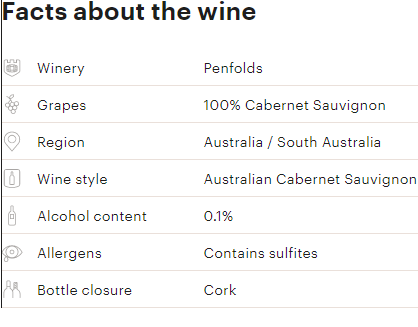


# alcohol == 0.0 인 값 구글에서 검색해서 채우기 => 실패

In [108]:
alcohol_0 = wine_df[wine_df['alcohol']==0]
alcohol_0.head(10)

,name,price,score,winery,grapes,country,region,alcohol,foods,wine_id,re
33,Rouge 2016,59.99,4.2,Domaine de l'A,Cabernet Franc,France,Castillon - Côtes de Bordeaux,0.0,"['Beef', 'Veal', 'Game (deer, venison)', 'Poul...",20917035,['Very pleasant red from Bordeaux right bank.\...
38,Blue Eyed Boy Shiraz 2019,54.99,4.4,Mollydooker,Shiraz/Syrah,Australia,Langhorne Creek,0.0,"['Beef', 'Lamb', 'Game (deer, venison)', 'Poul...",24558357,['Deep purple hue in the glass.\n\nLots of gen...
70,Brunello di Montalcino 2012,72.99,4.2,Altesino,Sangiovese,Italy,Brunello di Montalcino,0.0,"['Beef', 'Lamb', 'Game (deer, venison)', 'Poul...",15098161,['Perhaps the best Altesino I have tasted so f...
213,Deux Chevaux Vineyard Rabicano 2016,74.99,4.4,Tamber Bey,Cabernet Sauvignon,United States,Yountville,0.0,"['Beef', 'Lamb', 'Game (deer, venison)', 'Poul...",22694899,"['Perfect Bordeaux blend from Napa, bold, not ..."
232,Cabernet Sauvignon Affinity 2017,54.99,4.3,Robert Craig,Cabernet Sauvignon,United States,Napa Valley,0.0,"['Beef', 'Lamb', 'Game (deer, venison)', 'Matu...",24313126,"['09/24/21, 2017 vintage. \n\nDinner at Citize..."
248,Clos del Portal Negre de Negres 2018,26.46,4.2,Portal del Priorat,Grenache,Spain,Priorat,0.0,"['Beef', 'Lamb', 'Game (deer, venison)', 'Poul...",20988508,['Amazing wine. Medium plus body. Smoke. Fruit...
258,Fleurie 2019,57.99,4.4,Jean Foillard,Gamay,France,Fleurie,0.0,"['Pasta', 'Veal', 'Pork', 'Poultry']",25530583,"['Strawberry, black cherry, burnt wood, toffee..."
316,Napa Valley Cabernet Sauvignon 2018,34.95,4.2,Louis M. Martini,Cabernet Sauvignon,United States,Napa Valley,0.0,"['Beef', 'Lamb', 'Game (deer, venison)', 'Matu...",25681878,['Very very good. Bold. Great acid level. . Wh...
367,Beso de Dante 2014,49.99,4.3,Luca,Malbec,Argentina,Mendoza,0.0,"['Beef', 'Pasta', 'Lamb', 'Poultry']",18830027,['4.20 - Powerful ‘14 blend from Uco Valley - ...
368,Gran Cabernet Franc (XI) 2016,52.99,4.5,Pulenta Estate,Cabernet Franc,Argentina,Mendoza,0.0,"['Beef', 'Pork', 'Game (deer, venison)', 'Poul...",21218450,['The best Cabernet franc I ve tried. Deep rub...


In [161]:
wine_df['name'].value_counts()

Cabernet Sauvignon  2016                      146
Cabernet Sauvignon  2014                      139
Cabernet Sauvignon  2015                      126
Cabernet Sauvignon  2013                       93
Cabernet Sauvignon  2017                       92
                                             ... 
Clos d'Ora  2013                                1
Howell Mountain Cabernet Sauvignon  2008        1
Barolo San Lorenzo di Verduno  2012             1
Toneles Moscatel  N.V.                          1
Air Show Vineyard Cabernet Sauvignon  2018      1
Name: name, Length: 18323, dtype: int64

In [170]:
wine_df[wine_df['name'].str.contains("Cabernet Sauvignon")]['alcohol'].()

14.5

In [59]:
urls=[]
for name in alcohol_0['name']:
    urls.append('https://www.google.com/search?q='+name+'+alcohol+content')

In [8]:
#headers = {'User-Agent': 'Mozilla/5.0'} 

In [137]:
url = 'https://www.google.com/search?q=rouge+2016+alcohol+content'

In [138]:
driver = webdriver.Chrome(executable_path='(driver) chromedriver.exe') 

In [139]:
# driver.get(url)

In [176]:
# wine_name=[]
# wine_alcohol=[]
# count = 1
# origin_xpath = '/html/body/div[4]/div[2]/form/div[1]/div[1]/div[2]/div/div[2]/input'
# for name in alcohol_0['name']:
#     find_alcohol = name+" alcohol content"
#     try:
#         driver.find_element_by_xpath(origin_xpath).clear()
#         driver.find_element_by_xpath(origin_xpath).send_keys(find_alcohol)
#         driver.find_element_by_xpath(origin_xpath).submit()
#         alcohol_contents = driver.find_element_by_xpath(alcohol_xpath)
#         wine_alcohol.append(alcohol_contents.text[:-1])
#         wine_name.append(name)
#         time.sleep(1)
#     except:
#         wine_alcohol.append("")
#         wine_name.append(name)
        
#     print(count)
#     count+=1

In [154]:
# driver.quit()
# driver.close()

In [18]:
# wine_name=[]
# wine_alcohol=[]
# count = 1
# for url in urls:
#     web = requests.get(url, headers=headers).content
#     source = BeautifulSoup(web, 'html.parser')
#     try: 
#         for i in source.find_all('div',{'class':'BNeawe s3v9rd AP7Wnd'}):
#             find_alcohol = []
#             if '%'in str(i):
#                 find_alcohol.append(i)
#         wine_alcohol.append(find_alcohol[0].get_text()[:-1])
#         wine_name.append(url.split('?q=')[1].split('+alcohol+content')[0])
#     except:
#         wine_alcohol.append("")
#         wine_name.append(url.split('?q=')[1].split('+alcohol+content')[0])
#     count+=1
   # print(count)

# 가격 살펴보기

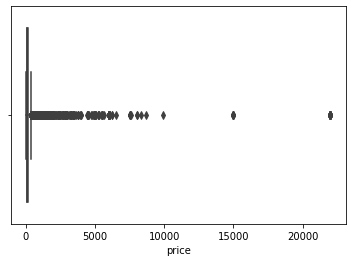

In [150]:
sns.boxplot(x=wine_df['price'])

In [151]:
wine_df['price'].describe()

count    23713.000000
mean       222.036865
std        815.167280
min          5.490000
25%         54.990000
50%         89.990000
75%        175.000000
max      21999.990000
Name: price, dtype: float64

In [120]:
# $10000이상은 값은 버림 => 2개

wine_price = wine_df[wine_df['price']<10000]

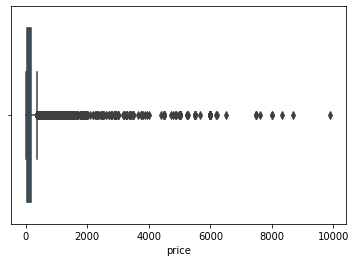

In [175]:
sns.boxplot(x=wine_price['price'])

# alcohol 빈값 채우기

In [20]:
wine_price ['name'].value_counts().head(100)

Cabernet Sauvignon  2016            146
Cabernet Sauvignon  2014            139
Cabernet Sauvignon  2015            126
Cabernet Sauvignon  2013             93
Cabernet Sauvignon  2017             92
                                   ... 
Vosne-Romanée  2017                  11
Vintage Port  2016                   11
Red  2014                            11
Reserve Cabernet Sauvignon  2014     11
Pomerol  2014                        11
Name: name, Length: 100, dtype: int64

In [22]:
import math

In [121]:
wine_price.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23687 entries, 0 to 23781
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   name     23687 non-null  object 
 1   price    23687 non-null  float64
 2   score    23687 non-null  float64
 3   winery   23687 non-null  object 
 4   grapes   23627 non-null  object 
 5   country  23680 non-null  object 
 6   region   23680 non-null  object 
 7   alcohol  14496 non-null  float64
 8   foods    23409 non-null  object 
 9   wine_id  23687 non-null  int64  
 10  re       23687 non-null  object 
dtypes: float64(3), int64(1), object(7)
memory usage: 2.2+ MB


In [30]:
wine_mean = wine_price['alcohol'].mean()

In [25]:
all_grapes = wine_df['grapes'].unique()

In [144]:
for i in range(len(wine_price)):
    for grape in all_grapes:
        try:
            if wine_price['grapes'][i]==grape:
                if (math.isnan(wine_price['alcohol'][i])==True) | (wine_price['alcohol'][i] == 0.0):
                    wine_price.at[i,'alcohol'] = wine_price[wine_price['grapes']==grape]['alcohol'].mean()
        except:
            continue

In [152]:
wine_price.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23687 entries, 0 to 23781
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   name     23687 non-null  object 
 1   price    23687 non-null  float64
 2   score    23687 non-null  float64
 3   winery   23687 non-null  object 
 4   grapes   23627 non-null  object 
 5   country  23680 non-null  object 
 6   region   23680 non-null  object 
 7   alcohol  23687 non-null  float64
 8   foods    23409 non-null  object 
 9   wine_id  23687 non-null  int64  
 10  re       23687 non-null  object 
dtypes: float64(3), int64(1), object(7)
memory usage: 2.7+ MB


In [151]:
wine_price['alcohol'].fillna(wine_mean,inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\series.py:4469: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [153]:
wine_price['alcohol'].replace(0.0,wine_mean,inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\series.py:4515: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [156]:
# 중복 wine_ id 제거
wine_new = wine_price.drop_duplicates(['wine_id'], keep = 'first')

In [157]:
wine_new['wine_id'].value_counts().head()

21004288    1
20197873    1
17358161    1
527346      1
20360527    1
Name: wine_id, dtype: int64

In [159]:
wine_new.isnull().sum()

name         0
price        0
score        0
winery       0
grapes      60
country      7
region       7
alcohol      0
foods      277
wine_id      0
re           0
dtype: int64

In [24]:
wine_df['price'].describe()

count    23394.000000
mean       224.168584
std        820.428463
min          5.490000
25%         54.990000
50%         89.990000
75%        179.000000
max      21999.990000
Name: price, dtype: float64

In [140]:
#'rev_alcohol' : 도수 낮을수록 점수 높음
wine_df['rev_alcohol'] = 100 - wine_df['alcohol']

#'price' :  가격 낮을수록 점수 높은 
# wine_df['rev_price'] = 22000 - wine_df['alcohol']

In [142]:
# min_max 
def norm(x):
    _max = x.max()
    _min = x.min()
    _denom = _max - _min
    return (x - _min) / _denom

for i in ['score','alcohol','rev_alcohol','price']:#,'rev_price'
    update_df = wine_df[[i]]
    wine_df[[i]]= norm(update_df)
    wine_df[i] = wine_df[i].round(2)

In [143]:
wine_df.head()

,name,price,score,winery,grapes,country,region,alcohol,foods,wine_id,re,rev_alcohol
0,Rim Rock Vineyard Syrah 2017,0.0,0.33,Piedrasassi,Shiraz/Syrah,United States,Arroyo Grande Valley,0.30,"['Beef', 'Lamb', 'Game (deer, venison)', 'Poul...",19603399,['Dry tingly cool bottle pairs with seafood ho...,0.70
1,Tradition Châteauneuf-du-Pape 2015,0.0,0.22,Domaine Giraud,Grenache,France,Châteauneuf-du-Pape,0.30,"['Lamb', 'Pork', 'Poultry']",18191466,"['Black cherry, oak. Leather, earthy. Great b...",0.70
2,Estate Cabernet Sauvignon 2013,0.0,0.33,Brandlin,Cabernet Sauvignon,United States,Mount Veeder,0.30,"['Beef', 'Lamb', 'Game (deer, venison)', 'Matu...",13886692,['Wine walk favorite! This estate cab is fant...,0.70
3,Imperio LXXIV Primitivo di Manduria 2018,0.0,0.22,Feudo Croce,Primitivo,Italy,Primitivo di Manduria,0.32,"['Beef', 'Pasta', 'Lamb', 'Poultry']",25311528,"['Plum, fig, pepper, cherry. ', 'Lots of dark ...",0.68
4,Corte di Cama Sforzato di Valtellina 2016,0.0,0.33,Mamete Prevostini,Nebbiolo,Italy,Sforzato della Valtellina,0.30,"['Beef', 'Lamb', 'Game (deer, venison)', 'Poul...",25588649,['A bit of a disappointment honestly. Have rea...,0.70


In [144]:
# for i in range(0,len(wine_df)):

#     if list in wine_df['foods'][i]:
#         wine_df['foods'][i] = wine_df['foods'][i].replace('Game (deer, venison)', 'Game')
#         wine_df['foods'][i] = wine_df['foods'][i].replace(','," ")
#     else:
        
#     food_name = wine_df['foods'][i]
#     wine_df['foods'][i] = re.sub('[^a-zA-Z]','', str(food_name))
#     wine_df['foods'][i] = wine_df['foods'][i].split("X")

In [30]:
# #food종류 확인
# food_index = {}
# for i in range(0,len(wine_df['foods'])):
#     for food in wine_df['foods'][i]:
#       if food not in food_index.keys():
#         food_index[food] = len(food_index)
# print(food_index)

TypeError: 'float' object is not iterable

리뷰데이터 분석